## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[ 4, 38, 69],
       [79, 89, 94],
       [ 3, 44, 54],
       [75, 76, 86],
       [13, 14, 99],
       [19, 60, 91]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([ 4, 38, 69]), array([79, 89, 94]))

The lowest card in the game is

In [5]:
np.min(cards)

3

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

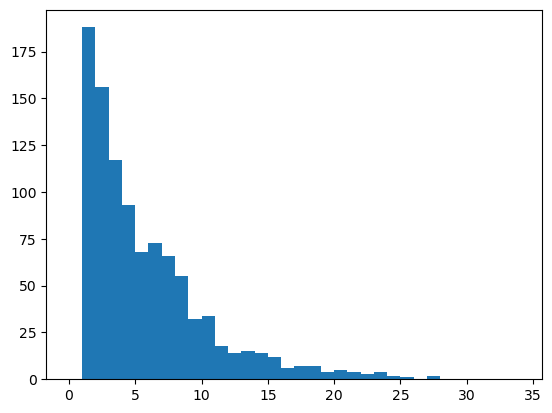

In [7]:
# To Do cell
lst_cards = []
simu_times = 1000
N = 100
n = 6
k = 3
for i in range(simu_times):
    cards = sample_cards(N,n,k)
    lst_card = np.min(cards)
    lst_cards.append(lst_card)
plt.hist(lst_cards, bins = np.arange(0,35,1))
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [8]:
def get_max_gap(cards):
    sorted_cards = np.sort(cards.flatten())
    max_gap = np.max(np.diff(sorted_cards))
    return max_gap

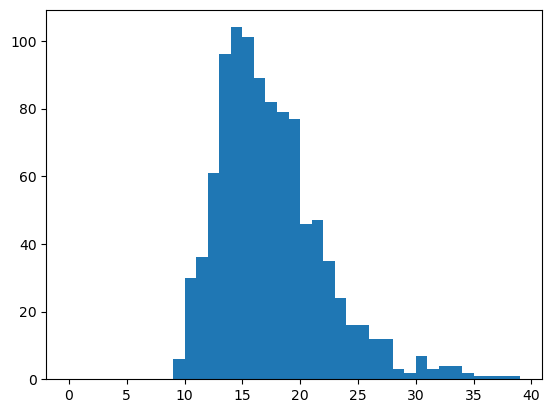

In [9]:
simu_times = 1000
N =100
n = 6
k = 3
max_gaps = []
for _ in range(simu_times):
    cards = sample_cards(N,n,k)
    max_gap = get_max_gap(cards)
    max_gaps.append(max_gap)
plt.hist(max_gaps, bins=np.arange(0,40,1))
plt.show()

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [10]:
def get_valid_max_gap(cards):
    
    # sample cards and flatten
    flatten_cards = cards.flatten()
    n, k = cards.shape
    cards_player = np.repeat(np.arange(n),k)

    # sort cards as well as players
    cards_idx = list(zip(flatten_cards.tolist(), cards_player.tolist()))
    cards_idx.sort(key = lambda x:x[0])
    cards_sorted = [x[0] for x in cards_idx]
    idx_sorted = [x[1] for x in cards_idx]

    # rule out those gaps from the same players
    cards_diff = np.diff(cards_sorted)
    idx_diff = np.diff(idx_sorted)
    valid_cards_diff = cards_diff[idx_diff != 0]
    
    # calculate valid max gap
    valid_max_gap = np.max(valid_cards_diff)

    return valid_max_gap

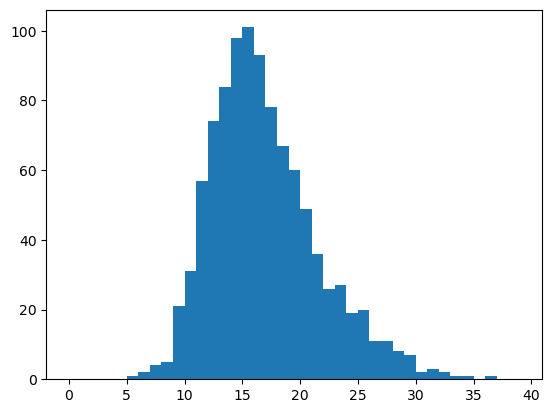

In [11]:
simu_times = 1000
N = 100
n = 6
k = 3
valid_max_gaps = []
for _ in range(simu_times):
    cards = sample_cards(N,n,k)
    valid_max_gap = get_valid_max_gap(cards)
    valid_max_gaps.append(valid_max_gap)

plt.hist(valid_max_gaps, bins=np.arange(0,40,1))
plt.show()

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

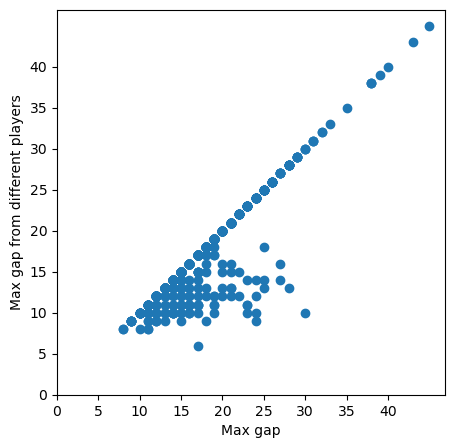

In [12]:
# compare these two gaps within the same sample
simu_times = 1000
N = 100
n = 6
k = 3
max_gaps = []
valid_max_gaps = []
for i in range(simu_times):
    cards = sample_cards(N,n,k)
    this_max_gap = get_max_gap(cards)
    this_valid_max_gap = get_valid_max_gap(cards)
    max_gaps.append(this_max_gap)
    valid_max_gaps.append(this_valid_max_gap)

plt.subplots(figsize=(5,5))
plt.scatter(x = max_gaps, y = valid_max_gaps)
plt.xticks(np.arange(0,45,5))
plt.yticks(np.arange(0,45,5))
plt.xlabel("Max gap")
plt.ylabel("Max gap from different players")
plt.show()

In [13]:
def get_max_gaps(simu_times, N, n, k):
    max_gaps = []
    for _ in range(simu_times):
        cards = sample_cards(N,n,k)
        max_gap = get_max_gap(cards)
        max_gaps.append(max_gap)
    return max_gaps

In [14]:
def get_valid_max_gaps(simu_times, N, n, k):
    valid_max_gaps = []
    for _ in range(simu_times):
        cards = sample_cards(N,n,k)
        valid_max_gap = get_valid_max_gap(cards)
        valid_max_gaps.append(valid_max_gap)
    return valid_max_gaps

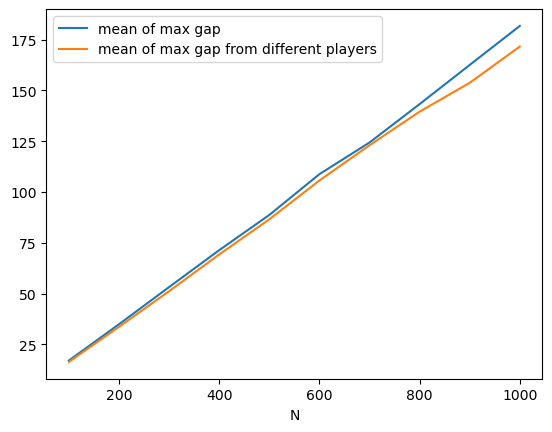

In [15]:
# test N
n_test = []
n_max_gaps = []
n_valid_max_gaps = []
simu_times = 1000
n = 6
k = 3
for N in np.arange(100,1100,100):
    this_max_gap = np.mean(get_max_gaps(simu_times, N, n, k))
    this_valid_max_gap = np.mean(get_valid_max_gaps(simu_times, N, n, k))
    res = this_max_gap - this_valid_max_gap
    n_test.append(res)
    n_max_gaps.append(this_max_gap)
    n_valid_max_gaps.append(this_valid_max_gap)

plt.plot(np.arange(100,1100,100), n_max_gaps, label='mean of max gap')
plt.plot(np.arange(100,1100,100), n_valid_max_gaps, label='mean of max gap from different players')
plt.xlabel('N')
plt.legend()
plt.show()

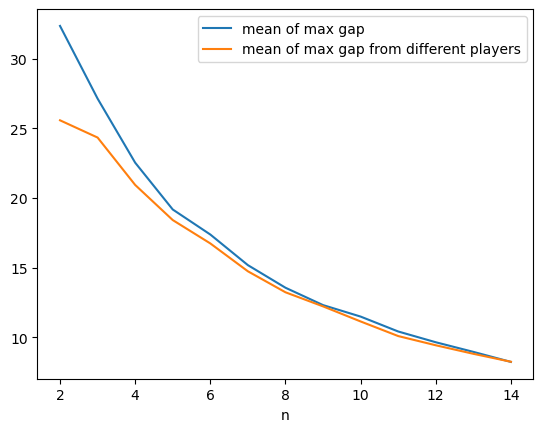

In [16]:
# test n
n_test = []
n_max_gaps = []
n_valid_max_gaps = []
simu_times = 1000
N = 100
k = 3
for n in range(2,15):
    this_max_gap = np.mean(get_max_gaps(simu_times, N, n, k))
    this_valid_max_gap = np.mean(get_valid_max_gaps(simu_times, N, n, k))
    res = this_max_gap - this_valid_max_gap
    n_test.append(res)
    n_max_gaps.append(this_max_gap)
    n_valid_max_gaps.append(this_valid_max_gap)

plt.plot(np.arange(2,15), n_max_gaps, label='mean of max gap')
plt.plot(np.arange(2,15), n_valid_max_gaps, label='mean of max gap from different players')
plt.xlabel('n')
plt.legend()
plt.show()

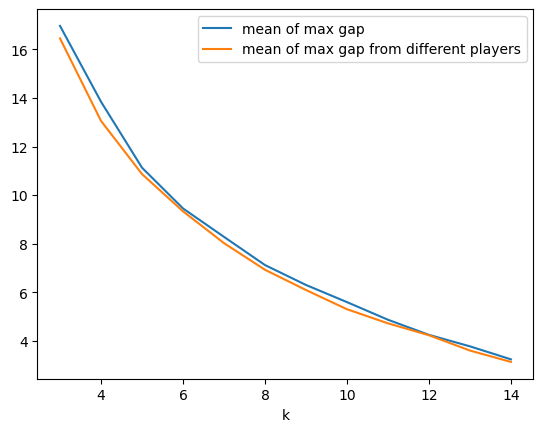

In [17]:
# test k
k_test = []
k_max_gaps = []
k_valid_max_gaps = []
simu_times = 1000
N = 100
n = 6
for k in range(3,15):
    this_max_gap = np.mean(get_max_gaps(simu_times, N, n, k))
    this_valid_max_gap = np.mean(get_valid_max_gaps(simu_times, N, n, k))
    res = this_max_gap - this_valid_max_gap
    k_test.append(res)
    k_max_gaps.append(this_max_gap)
    k_valid_max_gaps.append(this_valid_max_gap)

plt.plot(np.arange(3,15), k_max_gaps, label='mean of max gap')
plt.plot(np.arange(3,15), k_valid_max_gaps, label='mean of max gap from different players')
plt.xlabel('k')
plt.legend()
plt.show()

As we can see, for the same sample, the largerest gap among all cards is always larger than the largest gap between different players. In the sense of distribution, as N grows, the mean gap would get bigger. But as n and k grows, the mean gap would get smaller.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

In [18]:
# change the sample_cards function to allow replacement
def sample_cards_rep(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

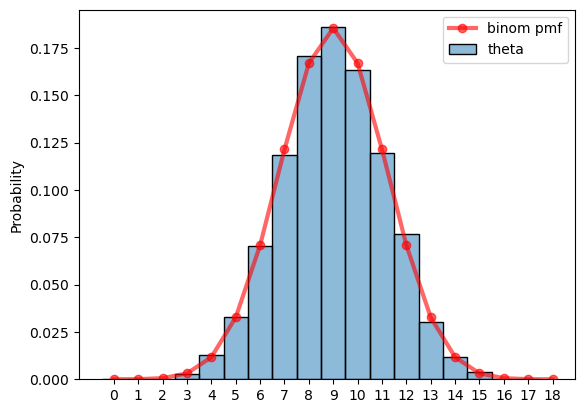

In [19]:
from scipy.stats import binom
import seaborn as sns

# the number of cards that are > 50, theta, follows a binomial distribution of Binom(18,0.5)
thetas = []
n_simu = 10000
for _ in range(n_simu):
    cards = sample_cards_rep(100,6,3)
    theta = np.sum(cards > 50)
    thetas.append(theta)

# plot against theoretical binomial distribution
fig, ax = plt.subplots(1,1)
sns.histplot(x=thetas, bins=np.arange(-0.5,18.5), stat='probability', alpha=0.5, label='theta')
ax.plot(np.arange(0,19), binom.pmf(np.arange(0,19),18,0.5),'r-o', lw=3, alpha=0.6, label='binom pmf')
plt.xticks(np.arange(0,19))
plt.legend()
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

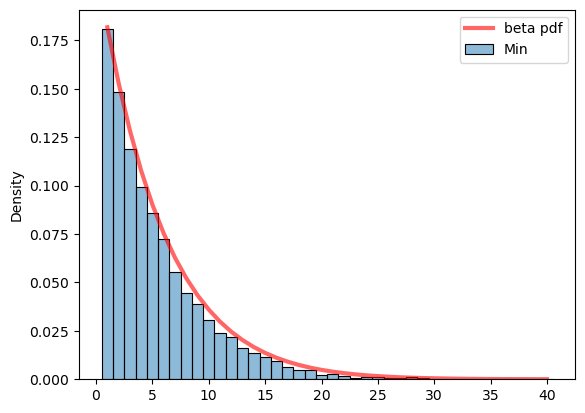

In [20]:
from scipy.stats import beta

# sampling the min
mins = []
n_simu = 10000
for _ in range(n_simu):
    cards = sample_cards(100, 6, 3)
    this_min = np.min(cards)
    mins.append(this_min)

# plot against theoretical beta distribution
fig, ax = plt.subplots(1, 1)
sns.histplot(x=mins, bins=np.arange(0.5,41.5,1), stat='density', alpha=0.5, label='Min')
ax.plot(np.arange(1,41), beta.pdf(np.arange(1,41), 1, 18, loc=1, scale=99), 'r-', lw=3, alpha=0.6, label='beta pdf')
# betas = beta.cdf(np.arange(1.5,40.5), 1, 18, loc=1, scale=99) - beta.cdf(np.arange(0.5,39.5), 1, 18, loc=1, scale=99)
# ax.plot(np.arange(1,40), betas, 'r-', lw=3, alpha=0.6, label='beta pdf')
plt.legend()
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

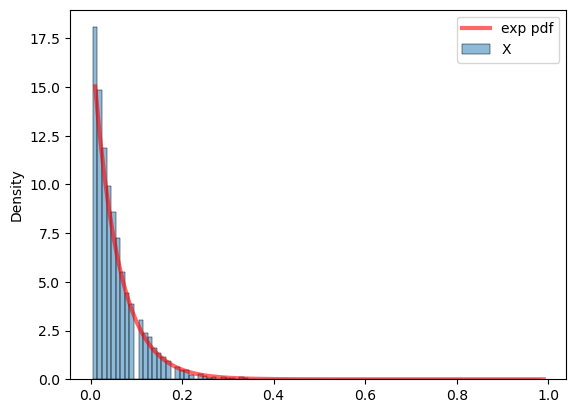

In [21]:
from scipy.stats import expon

# calculate X
Xs = -np.log(1-np.array(mins)/100)

# plot against theoretical exponential distribution
nk = 18
fig, ax = plt.subplots(1, 1)
sns.histplot(Xs, bins=np.arange(0.005,0.995,0.01), stat='density', alpha=0.5, label='X')
ax.plot(np.arange(0.01,1,0.01), expon.pdf(np.arange(0.01,1,0.01), scale=1/nk),'r-', lw=3, alpha=0.6, label='exp pdf')
plt.legend()
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [22]:
N = 1000
n = 6
k = 3

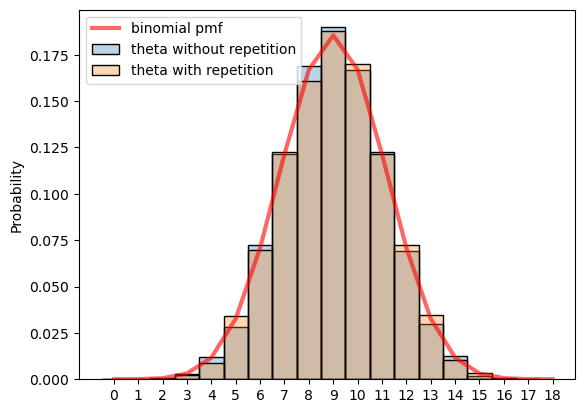

In [23]:
# Binomial, without vs with repetition
# the number of cards that are > N/2, theta, follows a binomial distribution of Binom(18,0.5)
n_simu = 10000

thetas = []
for _ in range(n_simu):
    cards = sample_cards(N,n,k)
    theta = np.sum(cards > N/2)
    thetas.append(theta)

thetas_rep = []
for _ in range(n_simu):
    cards = sample_cards_rep(N,n,k)
    theta = np.sum(cards > N/2)
    thetas_rep.append(theta)
    
# plot against theoretical binomial distribution
fig, ax = plt.subplots(1,1)
sns.histplot(x=thetas, bins=np.arange(-0.5,18.5), stat='probability', alpha=0.3, color='C0', label='theta without repetition')
sns.histplot(x=thetas_rep, bins=np.arange(-0.5,18.5), stat='probability', alpha=0.3, color='C1', label='theta with repetition')
ax.plot(np.arange(0,19), binom.pmf(np.arange(0,19),18,0.5),'r-', lw=3, alpha=0.6, label='binomial pmf')
plt.xticks(np.arange(0,19))
plt.legend()
plt.show()

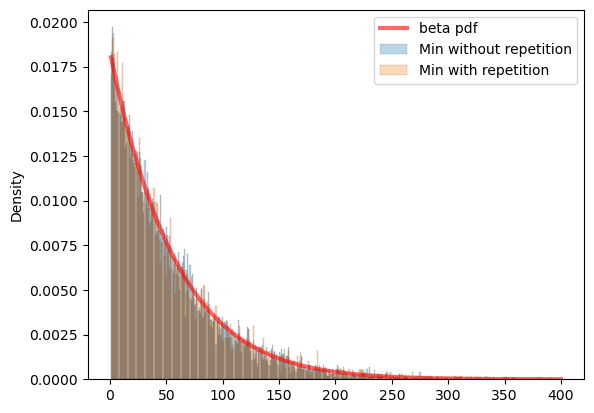

In [24]:
# Beta, without vs with repetition
# sampling the min
n_simu = 10000

mins = []
for _ in range(n_simu):
    cards = sample_cards(N, n, k)
    this_min = np.min(cards)
    mins.append(this_min)

mins_rep = []
for _ in range(n_simu):
    cards = sample_cards_rep(N, n, k)
    this_min = np.min(cards)
    mins_rep.append(this_min)
    
# plot against theoretical beta distribution
fig, ax = plt.subplots(1, 1)
sns.histplot(x=mins, bins=np.arange(0.5,401.5,1), stat='density', alpha=0.3, color='C0', label='Min without repetition')
sns.histplot(x=mins_rep, bins=np.arange(0.5,401.5,1), stat='density', alpha=0.3, color='C1', label='Min with repetition')
ax.plot(np.arange(1,401), beta.pdf(np.arange(1,401), 1, 18, loc=1, scale=N-1), 'r-', lw=3, alpha=0.6, label='beta pdf')
plt.legend()
plt.show()

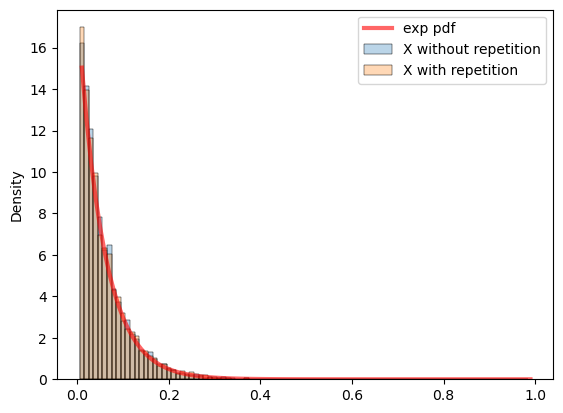

In [25]:
# exp, without vs with repetition
# calculate X
Xs = -np.log(1-np.array(mins)/N)
Xs_rep = -np.log(1-np.array(mins_rep)/N)

# plot against theoretical exponential distribution
nk = 18
fig, ax = plt.subplots(1, 1)
sns.histplot(Xs, bins=np.arange(0.005,0.995,0.01), stat='density', color='C0', alpha=0.3, label='X without repetition')
sns.histplot(Xs_rep, bins=np.arange(0.005,0.995,0.01), stat='density', color='C1', alpha=0.3, label='X with repetition')
ax.plot(np.arange(0.01,1,0.01), expon.pdf(np.arange(0.01,1,0.01), scale=1/nk),'r-', lw=3, alpha=0.6, label='exp pdf')
plt.legend()
plt.show()

As N gets very large, the difference between sample with or without repetition gets negligible and becomes more closed to the theoretical distribution.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Jerry Jin (GitHub username: BeiGeJin)
- Member No2: 
- Member No3: